<a href="https://colab.research.google.com/github/patakib/weather_analysis_RNN/blob/main/weather_analysis_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from google.colab import files

In [5]:
raw = files.upload()

Saving weatherHistory.csv to weatherHistory.csv


In [6]:
rawdf = pd.read_csv('weatherHistory.csv')

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
rawdf.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [9]:
print("There are {} records and {} features in the dataset".format(rawdf.shape[0], rawdf.shape[1]))

There are 96453 records and 12 features in the dataset


In [10]:
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


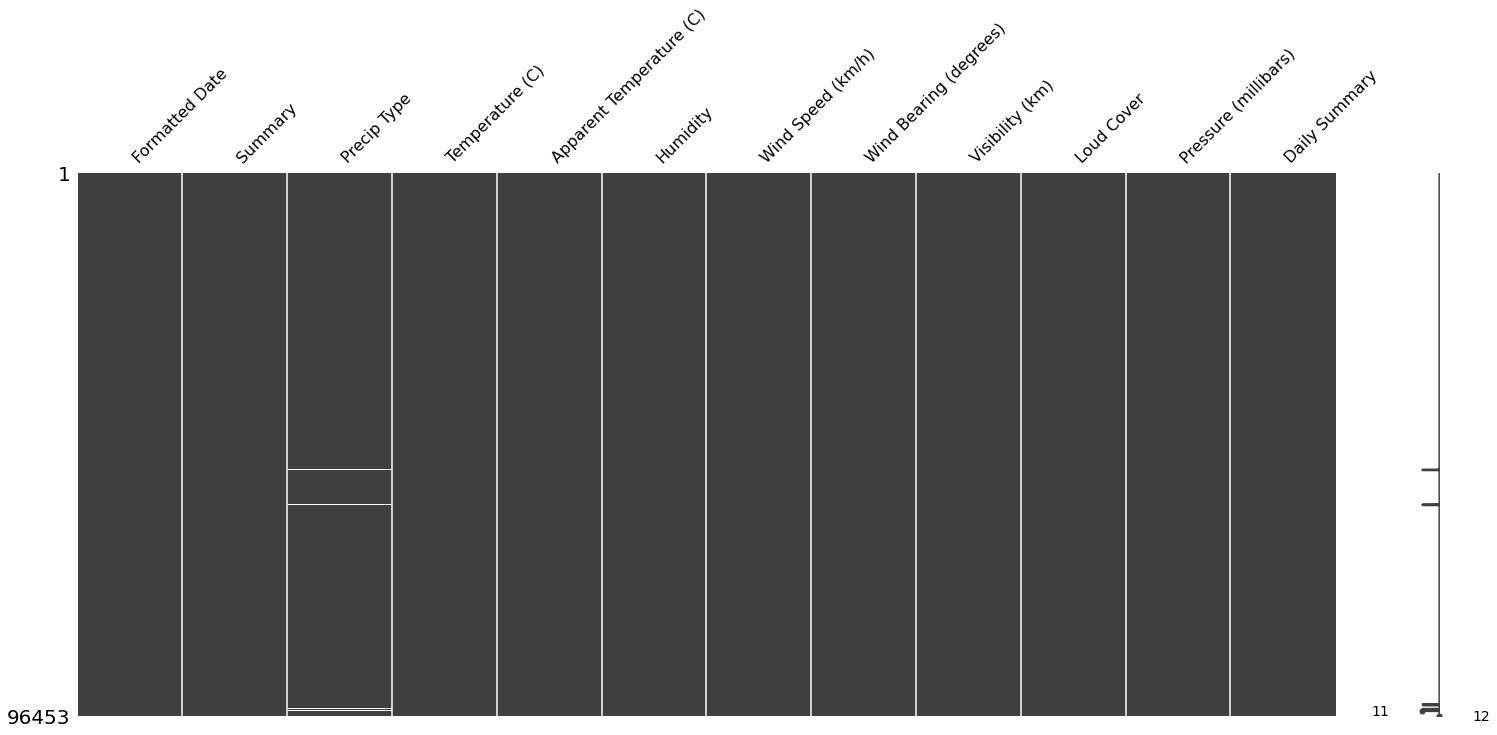

In [11]:
import missingno as msno
msno.matrix(rawdf)

In [12]:
rawdf.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Temperature (C),96453.0,11.93,9.55,-21.82,4.69,12.00,18.84,39.91
Apparent Temperature (C),96453.0,10.86,10.70,-27.72,2.31,12.00,18.84,39.34
Humidity,96453.0,0.73,0.20,0.00,0.60,0.78,0.89,1.00
Wind Speed (km/h),96453.0,10.81,6.91,0.00,5.83,9.97,14.14,63.85
Wind Bearing (degrees),96453.0,187.51,107.38,0.00,116.00,180.00,290.00,359.00
Visibility (km),96453.0,10.35,4.19,0.00,8.34,10.05,14.81,16.10
Loud Cover,96453.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Pressure (millibars),96453.0,1003.24,116.97,0.00,1011.90,1016.45,1021.09,1046.38


In [13]:
date_time = rawdf['Formatted Date'].apply(pd.to_datetime, utc=True)

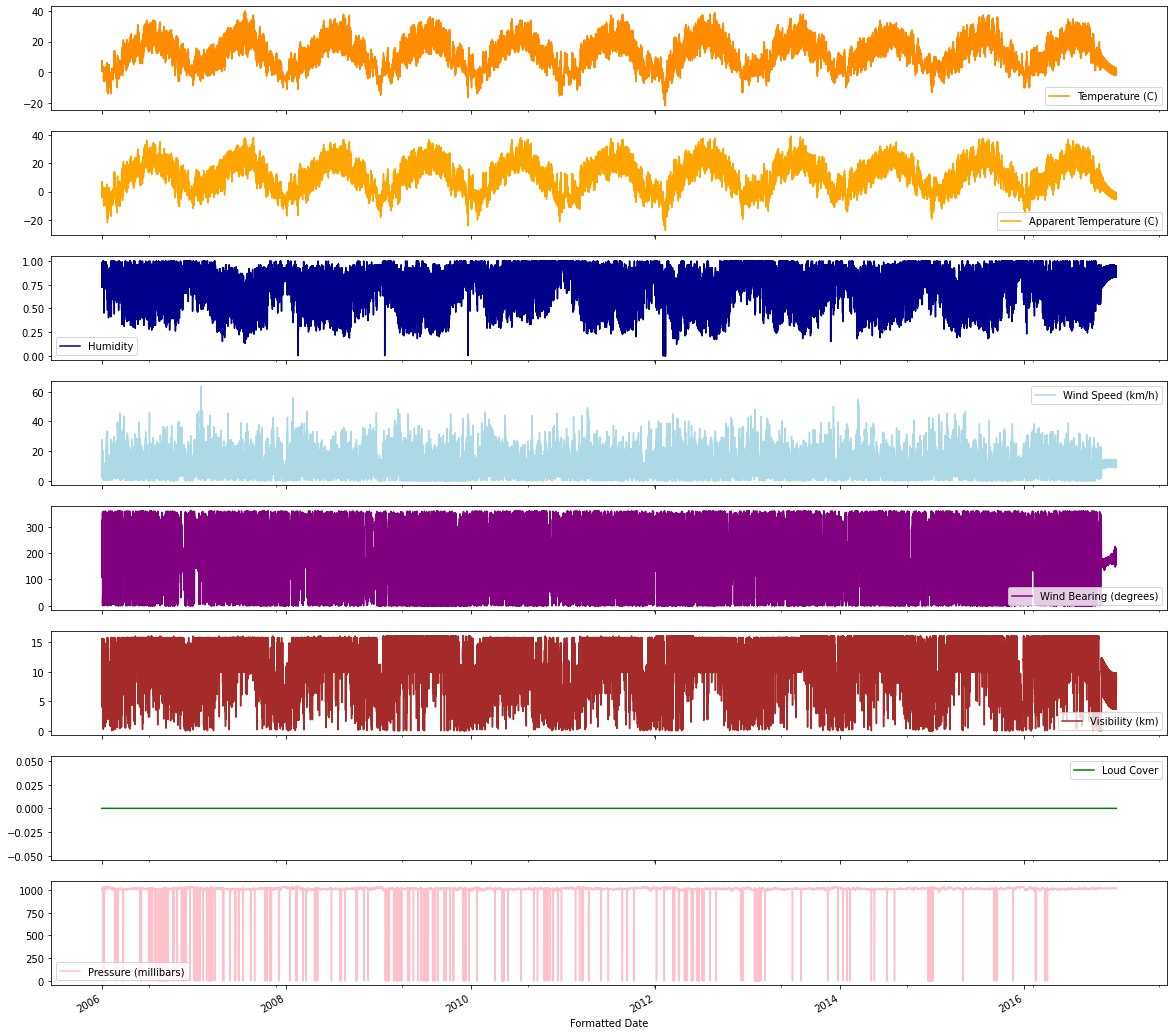

In [14]:
plot_cols = list(rawdf.columns.values)
plot_features = rawdf[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True, color=['darkorange','orange','darkblue','lightblue','purple','brown','green','pink'], figsize=(20,20))

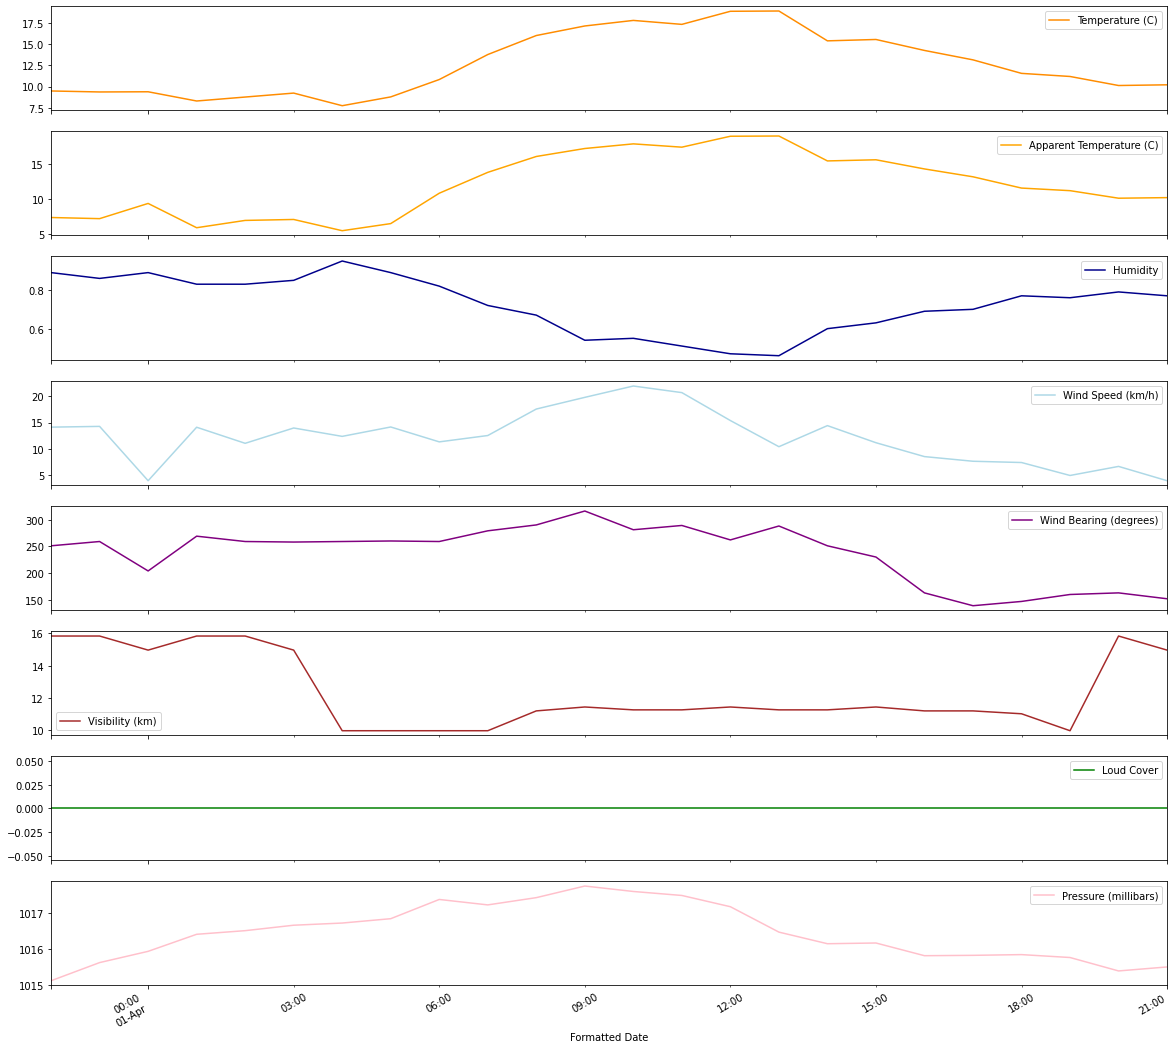

In [15]:
plot_features = rawdf[plot_cols][:24]
plot_features.index = date_time[:24]
_ = plot_features.plot(subplots=True, color=['darkorange','orange','darkblue','lightblue','purple','brown','green','pink'], figsize=(20,20))

In [56]:
import plotly.express as px
df = px.data.wind()
df

,direction,strength,frequency
0,N,0-1,0.5
1,NNE,0-1,0.6
2,NE,0-1,0.5
3,ENE,0-1,0.4
4,E,0-1,0.4
...,...,...,...
123,WSW,6+,0.1
124,W,6+,0.9
125,WNW,6+,2.2
126,NW,6+,1.5


In [57]:
winddf = rawdf[['Wind Bearing (degrees)','Wind Speed (km/h)']]

In [84]:
winddf.head()

,Wind Bearing (degrees),Wind Speed (km/h),Wind Bearing,Wind Speed Categories
0,251.0,14.1197,WSW,11-20 km/h
1,259.0,14.2646,W,11-20 km/h
2,204.0,3.9284,SSW,0-10 km/h
3,269.0,14.1036,W,11-20 km/h
4,259.0,11.0446,W,11-20 km/h


In [85]:
bins = [0,11.25,33.75,56.25,78.75,101.25,123.75,146.25,168.75,191.25,213.75,236.25,258.75,281.25,303.75,326.25,348.75]
names = ['N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW']

winddf['Wind Bearing'] = pd.cut(winddf['Wind Bearing (degrees)'], bins, labels=names,ordered=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
winddf.head()

,Wind Bearing (degrees),Wind Speed (km/h),Wind Bearing,Wind Speed Categories
0,251.0,14.1197,WSW,11-20 km/h
1,259.0,14.2646,W,11-20 km/h
2,204.0,3.9284,SSW,0-10 km/h
3,269.0,14.1036,W,11-20 km/h
4,259.0,11.0446,W,11-20 km/h


In [87]:
max(winddf['Wind Speed (km/h)'])

63.8526

In [88]:
np.percentile(winddf['Wind Speed (km/h)'],25)

5.828200000000002

In [89]:
speed_bins = [0,10,20,30,40,50,60,70]
speed_categories = ['0-10 km/h','11-20 km/h','21-30 km/h','31-40 km/h','41-50 km/h','51-60 km/h','60+ km/h']

winddf['Wind Speed Categories'] = pd.cut(winddf['Wind Speed (km/h)'], speed_bins, labels=speed_categories)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [90]:
winddf.head()

,Wind Bearing (degrees),Wind Speed (km/h),Wind Bearing,Wind Speed Categories
0,251.0,14.1197,WSW,11-20 km/h
1,259.0,14.2646,W,11-20 km/h
2,204.0,3.9284,SSW,0-10 km/h
3,269.0,14.1036,W,11-20 km/h
4,259.0,11.0446,W,11-20 km/h


In [91]:
winddf_grouped = winddf.groupby(by=['Wind Bearing','Wind Speed Categories']).agg({'Wind Speed (km/h)': ['count']}).reset_index()

In [92]:
winddf_grouped.columns = ['Wind Bearing','Wind Speed Categories','count']

In [93]:
winddf_grouped.head()

,Wind Bearing,Wind Speed Categories,count
0,N,0-10 km/h,1633
1,N,11-20 km/h,1630
2,N,21-30 km/h,471
3,N,31-40 km/h,51
4,N,41-50 km/h,0


In [100]:
import plotly.express as px
fig = px.bar_polar(winddf_grouped, r="count", theta="Wind Bearing",
                   color="Wind Speed Categories", template="plotly",
                   color_discrete_sequence= px.colors.sequential.haline)
fig.show()

Next step: transforming categorical features into numerical features.